In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("D:\DCU\Academics\Practicum\Project\dataset\Amazon Reviews Dataset.csv")

In [3]:
# Schema understanding
df.head()

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...


In [4]:
# List of columns in the dataset
df.columns

Index(['deceptive', 'hotel', 'polarity', 'source', 'text'], dtype='object')

In [5]:
# Understanding the datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB


In [6]:
# Unique values in each column
print(df.deceptive.unique())
print(df.hotel.unique())
print(df.polarity.unique())
print(df.source.unique())

['truthful' 'deceptive']
['conrad' 'hyatt' 'omni' 'fairmont' 'sheraton' 'knickerbocker' 'homewood'
 'swissotel' 'ambassador' 'affinia' 'hardrock' 'talbott' 'hilton' 'james'
 'monaco' 'sofitel' 'palmer' 'intercontinental' 'allegro' 'amalfi']
['positive' 'negative']
['TripAdvisor' 'MTurk' 'Web']


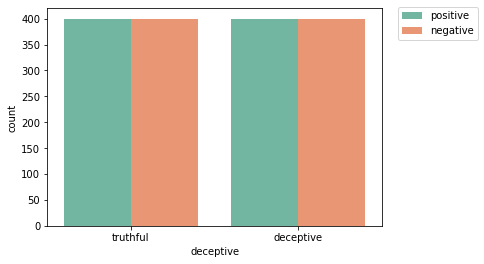

In [7]:
# Data visualization for real and fake reviews based on polarity

sns.countplot(x=df['deceptive'],hue='polarity',data=df, palette='Set2')
plt.legend(bbox_to_anchor=(1.3, 1.03),loc='upper right')
plt.show()

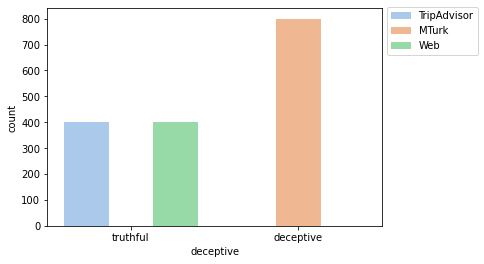

In [8]:
# Data visualization for real and fake reviews based on source of reviews
sns.countplot(x=df['deceptive'],hue='source',data=df,  palette='pastel')
plt.legend(bbox_to_anchor=(1.3, 1.03),loc='upper right')
plt.show()

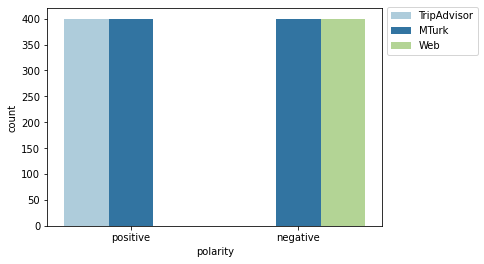

In [9]:
# Data visualization for positive and negative reviews based on source of reviews
sns.countplot(x=df['polarity'],hue='source',data=df, palette='Paired')
plt.legend(bbox_to_anchor=(1.3, 1.03),loc='upper right')
plt.show()

In [10]:
#!pip install wordcloud
from wordcloud import WordCloud
real = pd.DataFrame(df[df.deceptive == "truthful"].values, columns=df.columns)
real_reviews = ' '.join(real.text.values).replace("\n"," ")
fake = pd.DataFrame(df[df.deceptive == "deceptive"].values, columns=df.columns)
fake_reviews = ' '.join(real.text.values).replace("\n"," ")


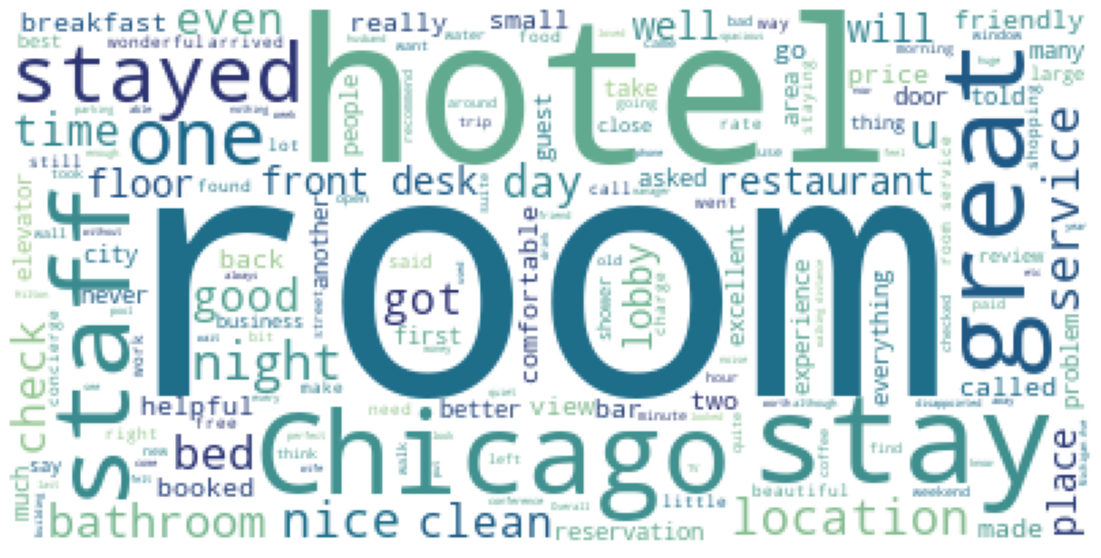

In [11]:
# Wordcloud for real reviews
wordcloud = WordCloud(background_color="white").generate(real_reviews)
wordcloud.recolor(colormap = "crest")
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
result = pd.read_csv("D:\DCU\Academics\Practicum\Project\dataset\Results.csv")
result.head()

,Activation function,Doc2Vec,GloVe
0,ReLu,91.25,90.15
1,Sigmoid,77.31,77.81
2,TanH,83.43,89.22
3,SELU,89.37,88.91
4,Swish,91.38,89.38


In [22]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Activation function  5 non-null      object 
 1   Doc2Vec              5 non-null      float64
 2   GloVe                5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


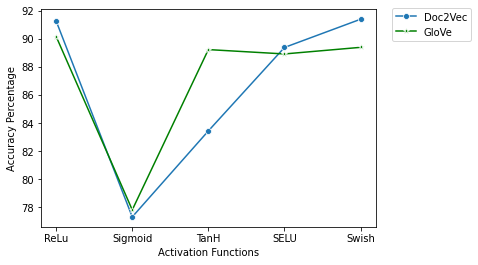

In [45]:
sns.lineplot(data=result, x="Activation function", y="Doc2Vec", marker='o')
sns.lineplot(data=result, x="Activation function", y="GloVe", marker='*', color="green")
plt.legend(labels=("Doc2Vec","GloVe"),bbox_to_anchor=(1.3, 1.03),loc='upper right')
plt.xlabel("Activation Functions")
plt.ylabel("Accuracy Percentage")
plt.show()